In [1]:
from sklearn.neighbors import LocalOutlierFactor
#!pip install emmv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
import matplotlib
import matplotlib.dates as mdates
%matplotlib inline
warnings.filterwarnings("ignore")
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go
import matplotlib.pyplot as plt
from matplotlib import pyplot
#import plotly.graph_objs as go
#init_notebook_mode(connected=True)
import eif as iso
from functions import load_dataset,calc_percent_NAs, adfuller_test,data_load
from sklearn import preprocessing
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from emmv import emmv_scores
from sklearn.cluster import KMeans
#!pip install ipympl
%matplotlib widget
from sklearn.metrics import silhouette_score

In [17]:
data = load_dataset("anomaly 3.csv")
data

name,Flow,P_1,P_3,P_4,P_5,T_2,T_3,T_4
Datetime,,,,,,,,
2021-03-11 10:10:00,47020.962524,2.083591,2.207742,1.494308,1.014526,NaN,23.092529,22.924228
2021-03-11 10:10:01,46970.432281,NaN,2.207284,NaN,1.014297,23.006652,23.098698,22.922855
2021-03-11 10:10:02,46931.465149,2.083860,2.207056,1.493851,1.014069,23.012825,23.106237,NaN
2021-03-11 10:10:03,46941.994858,2.084130,2.207513,1.494308,1.014526,23.013511,23.102810,22.915990
2021-03-11 10:10:04,47028.034973,NaN,2.206827,NaN,1.014297,NaN,23.090473,22.912557
...,...,...,...,...,...,...,...,...
2021-03-11 14:59:55,46302.044678,1.978631,NaN,NaN,1.011100,27.887662,27.969157,NaN
2021-03-11 14:59:56,46220.790482,1.977286,2.129547,1.477621,1.010415,27.889034,NaN,27.785660
2021-03-11 14:59:57,46267.901230,1.977016,2.129318,1.477164,NaN,27.888348,27.969842,27.793899


In [18]:
#### Lets see missing values 
missing = calc_percent_NAs(data)
cols = data.columns
index = pd.to_datetime(data.index,utc = True)
##Missing values imputation
lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=10, verbose=2, imputation_order='roman',random_state=0)
data = imp.fit_transform(data)
data = pd.DataFrame(data, columns=cols, index = index)
data

[IterativeImputer] Completing matrix with shape (17198, 8)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.07
[IterativeImputer] Change: 185.21818094469492, scaled tolerance: 47.176522064209 
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.17
[IterativeImputer] Change: 613.121087315142, scaled tolerance: 47.176522064209 
[IterativeImputer] Ending imputation round 3/10, elapsed time 0.23
[IterativeImputer] Change: 367.57762090566433, scaled tolerance: 47.176522064209 
[IterativeImputer] Ending imputation round 4/10, elapsed time 0.29
[IterativeImputer] Change: 240.76327517534, scaled tolerance: 47.176522064209 
[IterativeImputer] Ending imputation round 5/10, elapsed time 0.36
[IterativeImputer] Change: 127.88478513270789, scaled tolerance: 47.176522064209 
[IterativeImputer] Ending imputation round 6/10, elapsed time 0.43
[IterativeImputer] Change: 58.97193661217366, scaled tolerance: 47.176522064209 
[IterativeImputer] Ending imputation round 7/10, elap

name,Flow,P_1,P_3,P_4,P_5,T_2,T_3,T_4
Datetime,,,,,,,,
2021-03-11 10:10:00+00:00,47020.962524,2.083591,2.207742,1.494308,1.014526,23.026113,23.092529,22.924228
2021-03-11 10:10:01+00:00,46970.432281,2.083841,2.207284,1.496476,1.014297,23.006652,23.098698,22.922855
2021-03-11 10:10:02+00:00,46931.465149,2.083860,2.207056,1.493851,1.014069,23.012825,23.106237,22.927701
2021-03-11 10:10:03+00:00,46941.994858,2.084130,2.207513,1.494308,1.014526,23.013511,23.102810,22.915990
2021-03-11 10:10:04+00:00,47028.034973,2.083255,2.206827,1.495331,1.014297,23.010091,23.090473,22.912557
...,...,...,...,...,...,...,...,...
2021-03-11 14:59:55+00:00,46302.044678,1.978631,2.131307,1.479657,1.011100,27.887662,27.969157,27.806044
2021-03-11 14:59:56+00:00,46220.790482,1.977286,2.129547,1.477621,1.010415,27.889034,27.948747,27.785660
2021-03-11 14:59:57+00:00,46267.901230,1.977016,2.129318,1.477164,1.012492,27.888348,27.969842,27.793899


In [19]:
sca = StandardScaler()

index = data.index
data = sca.fit_transform(data)
data = pd.DataFrame(data, columns=cols, index=index)

data = data.diff().dropna()

In [20]:
def scoring_func(model, df):
    scores = []
    for i in range(len(df)):
        scores.append(clf.score(np.array(data.iloc[i]).reshape(1, -1)))
    scores = np.array(scores)
    return scores

In [21]:
clf = KMeans(n_clusters=2)
pred = clf.fit(data)
pred = pred.predict(data)
#em, mv = emmv_scores(clf, data, scoring_func).values()
#print("init = ", init, ", n_init=", n_init, ", score =", (em, mv))
print("silhouette score: ", silhouette_score(data, pred))

silhouette score:  0.23879424804688076


In [22]:
data['anomaly']=pred
print(data[data['anomaly']==1])

name                           Flow       P_1       P_3       P_4       P_5  \
Datetime                                                                      
2021-03-11 10:10:02+00:00 -0.118635  0.000538 -0.008738 -0.153164 -0.099009   
2021-03-11 10:10:04+00:00  0.261949 -0.024873 -0.026214  0.059663 -0.099009   
2021-03-11 10:10:06+00:00  0.296097 -0.167339 -0.137697 -0.040015 -0.198019   
2021-03-11 10:10:08+00:00 -0.237239  0.007654  0.008738 -0.026677 -0.540302   
2021-03-11 10:10:11+00:00  0.110754  0.015307  0.026214  0.013338 -0.099009   
...                             ...       ...       ...       ...       ...   
2021-03-11 14:59:51+00:00 -0.103887  0.007654  0.008738  0.013061 -0.198019   
2021-03-11 14:59:55+00:00  0.181904  0.038057  0.032293  0.105487 -0.937340   
2021-03-11 14:59:56+00:00 -0.247378 -0.038269 -0.067245 -0.118825 -0.297028   
2021-03-11 14:59:58+00:00 -0.088689  0.022961  0.026214 -0.069443 -1.197570   
2021-03-11 14:59:59+00:00  0.212885  0.007654  0.027

In [23]:
anomaly = data[data['anomaly']==1]
anomaly.to_csv('anomaly_kmeans')

In [24]:
outliers=data[data['anomaly']==1]
outlier_index=list(outliers.index)


pca = PCA(n_components=3)
data_reduced = pca.fit_transform(data)

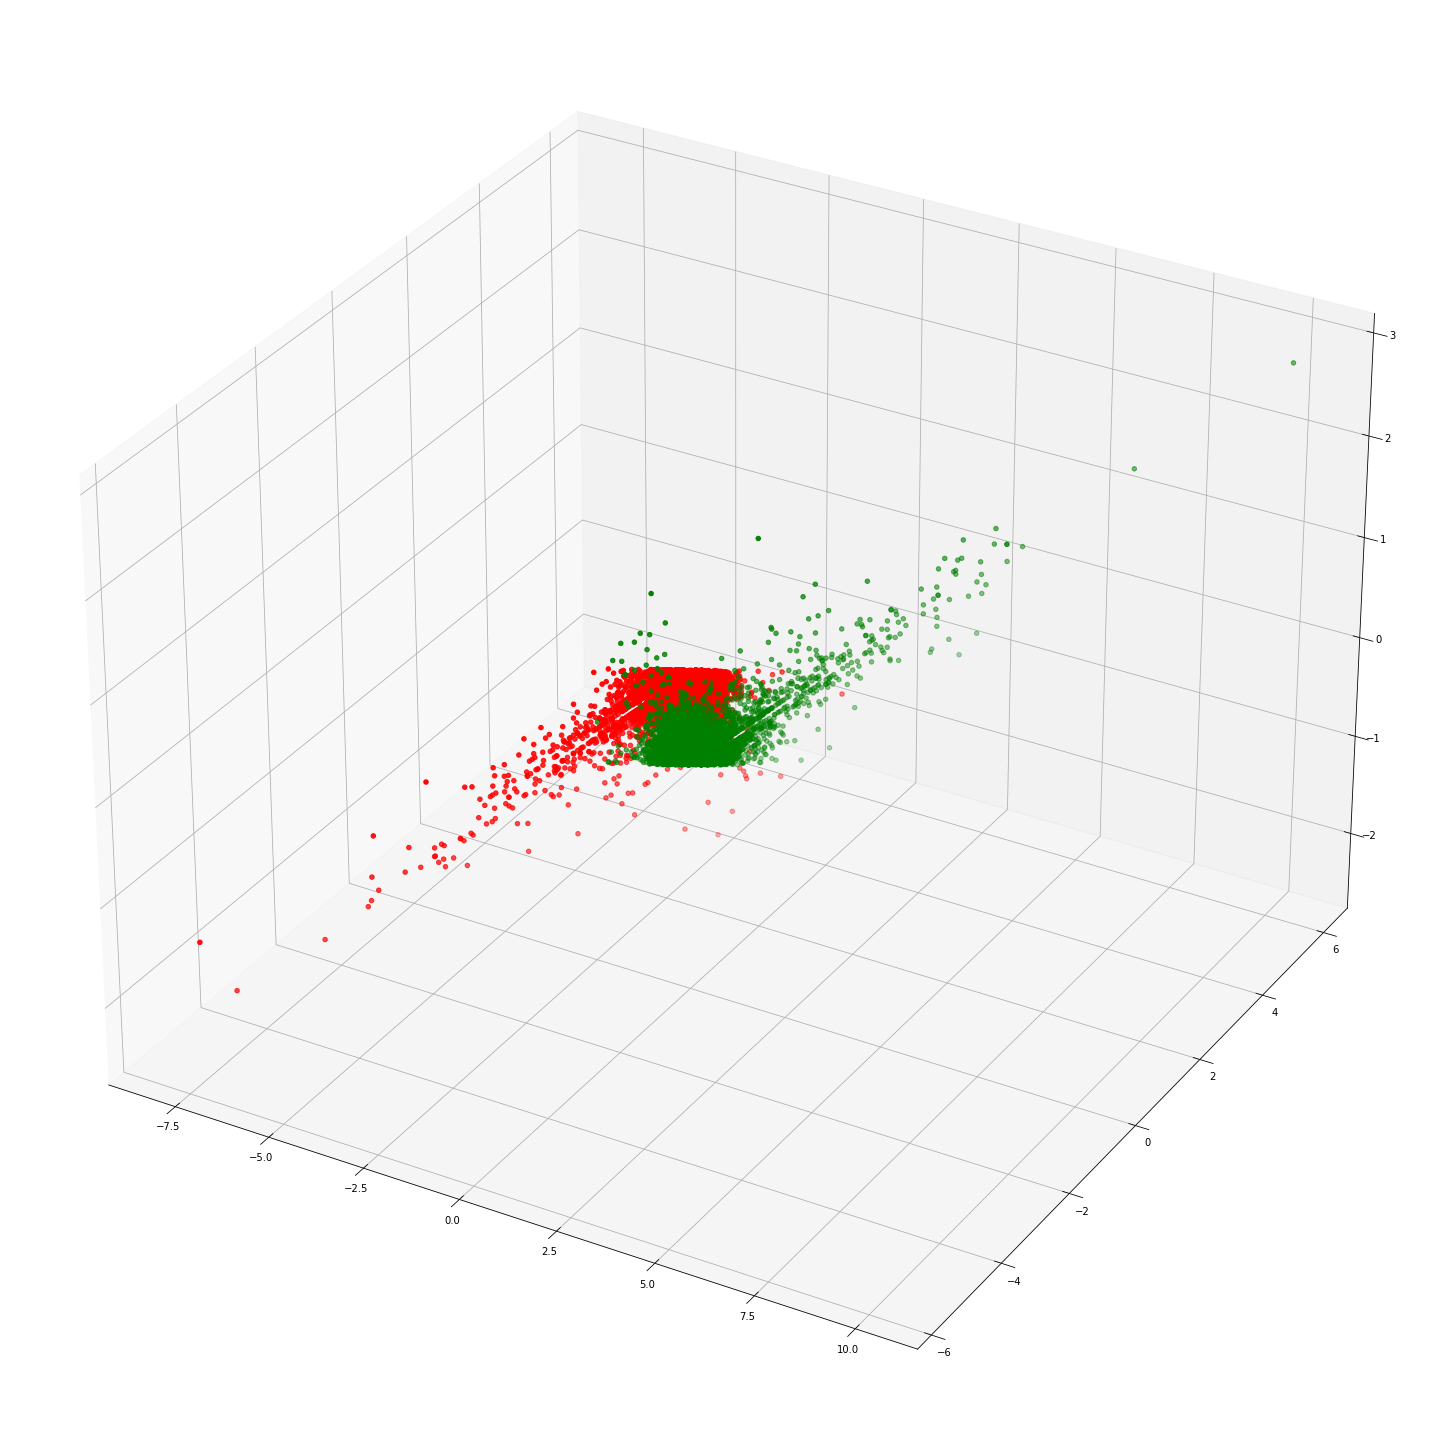

In [25]:
fig = plt.figure(figsize=(20,20))
ax = Axes3D(fig)

non_outlier = np.delete(data_reduced, outlier_index, 0)

ax.scatter(non_outlier[:,0], non_outlier[:,1], non_outlier[:, 2], color = 'green')
ax.scatter(data_reduced[outlier_index,0],data_reduced[outlier_index,1], data_reduced[outlier_index,2],color='red')

plt.show()

In [34]:
def distance_from_center(var1, var2 ,var3, label):
    '''
    Calculate the Euclidean distance between a data point and the center of its cluster.
:param float income: the standardized income of the data point 
    :param float age: the standardized age of the data point 
    :param int label: the label of the cluster
    :rtype: float
    :return: The resulting Euclidean distance  
    '''
    center1 =  clf.cluster_centers_[label,0]
    center2 =  clf.cluster_centers_[label,1]
    center3 = clf.cluster_centers_[label,2]
    distance = ((var1 - center1) ** 2 + (var2 - center2) ** 2 + (var3 - center3) ** 2)**(1/3)
    return np.round(distance, 3)


data['label'] = clf.labels_
data['distance'] = distance_from_center(data_reduced[:,0], data_reduced[:,1], data_reduced[:,2], data.label)

In [39]:
print(clf.cluster_centers_)

[[-0.30904207 -0.00087925  0.00168747  0.01604609  0.29773057  0.00124478
   0.00105179  0.00095347]
 [ 0.25840378  0.00041537 -0.00172661 -0.0135343  -0.24940154 -0.00067576
  -0.00051186 -0.00043158]]


In [35]:
outliers_idx = list(data.sort_values('distance', ascending=False).head(10).index)
outliers = data[data.index.isin(outliers_idx)]
print(outliers)

name        Flow       P_1       P_3       P_4       P_5       T_2       T_3  \
7040   -8.944026  0.007002  0.008738 -0.040015 -0.051582 -0.002412 -0.002904   
7041    7.606176 -0.083539 -0.087380  0.013338 -0.495046  0.002893 -0.003388   
7193    6.675052 -0.022961 -0.026214 -0.293655 -0.396037  0.003366 -0.002420   
7327    9.339651 -0.038269 -0.043690  0.026677 -0.297028  0.000962 -0.000484   
7359    6.559427 -0.352071 -0.366996 -0.693597 -0.297028  0.004328 -0.000484   
7642   -6.438629 -0.007654  0.008738  0.013338  0.198019  0.015018 -0.000484   
7664   -6.673955 -0.007654 -0.008738  0.013338 -0.099009 -0.001443  0.014085   
9966   -6.439925  0.007654  0.008738 -0.026677  0.198019 -0.003847  0.006614   
15441 -12.134079  0.015307 -0.025327 -0.013338 -0.099009  0.000481 -0.001452   
15442   9.425089  0.734757  0.907864  1.600608  1.287121 -0.000481  0.005809   

name        T_4  anomaly  label  distance  
7040  -0.005500        0      0     4.397  
7041   0.000484        1      1